In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle
import numpy as np
%matplotlib inline

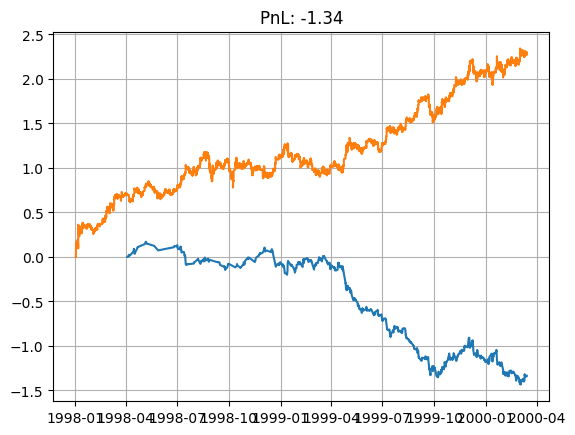

In [2]:
dft = pickle.load(open('PriceData.pick','rb'))
dates,pnls=pickle.load(open('pnls.pick','rb'))
plt.plot(dates,np.cumsum(pnls))


plt.plot(dft['close'].loc[:dates[-1]].pct_change().cumsum())
plt.grid()
plt.title('PnL: %.2f'%(sum(pnls)));

<AxesSubplot:>

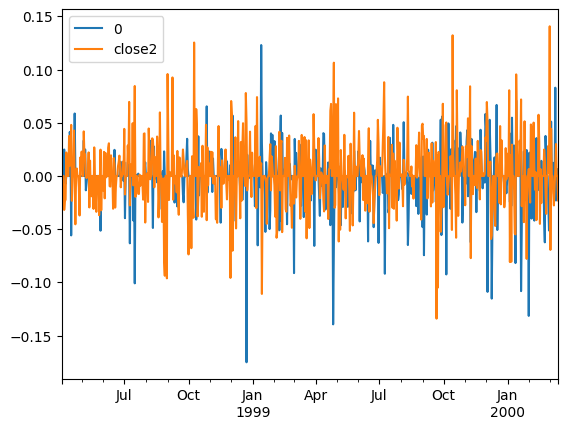

In [3]:
dfs_day = pd.DataFrame(pd.Series(pnls,index=dates)).resample('1D').sum()

dfs_day['close2'] = dft['close'].loc[:dates[-1]].pct_change().resample('1D').sum()
dfs_day = dfs_day.fillna(0)

dfs_day.plot()

-0.13870909138381446

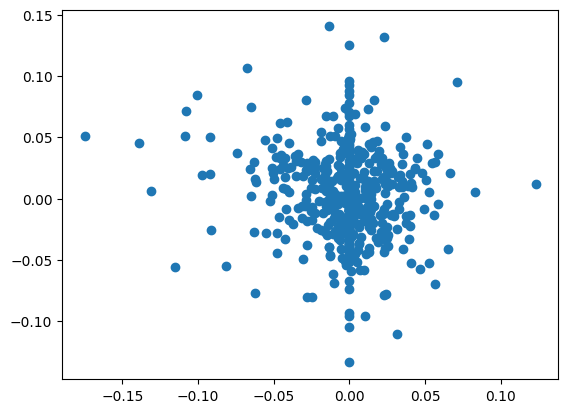

In [4]:
plt.plot(dfs_day[0],dfs_day['close2'],'o')
m = np.polyfit(dfs_day[0],dfs_day['close2'],1)
beta = m[0]
beta

In [5]:
# Sharpes for both
dfs_day.mean()/dfs_day.std()*np.sqrt(252)

0        -1.187703
close2    1.151504
dtype: float64

In [8]:
!copy pnls.pick pnls_ma3_98-11.pick

        1 file(s) copied.


In [7]:
0.15/np.sqrt(252)

0.00944911182523068